In [2]:
# Imports
import myPCA
import pandas as pd
import matplotlib.pyplot as plt


In [38]:
# Upload and first check
df = pd.read_csv('titanic.csv',delimiter=",",decimal=".")
print("Tamaño de datos:\n",df.shape)
print("Tipos de Columnas:\n",df.dtypes)
NaNColumns = df.columns[df.isna().any()]
print("Columnas con NA:\n",NaNColumns)
print("Cantidad de NA por columna:\n",df[NaNColumns].isnull().sum(axis = 0))

Tamaño de datos:
 (1309, 12)
Tipos de Columnas:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Columnas con NA:
 Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Cantidad de NA por columna:
 Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64
0.20091673032849502


Descripcion:
                Age        SibSp        Parch         Fare
count  1046.000000  1309.000000  1309.000000  1308.000000
mean     29.881138     0.498854     0.385027    33.295479
std      14.413493     1.041658     0.865560    51.758668
min       0.170000     0.000000     0.000000     0.000000
25%      21.000000     0.000000     0.000000     7.895800
50%      28.000000     0.000000     0.000000    14.454200
75%      39.000000     1.000000     0.000000    31.275000
max      80.000000     8.000000     9.000000   512.329200


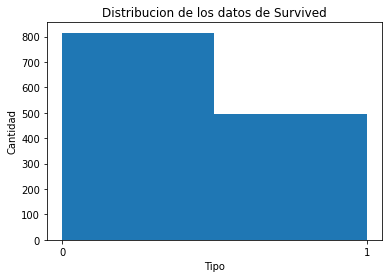

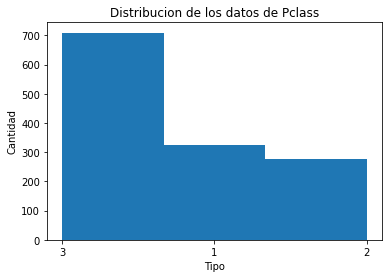

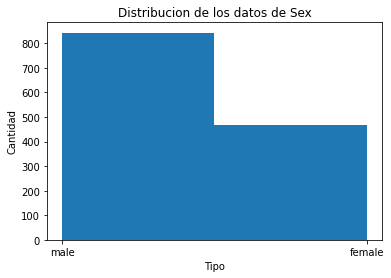

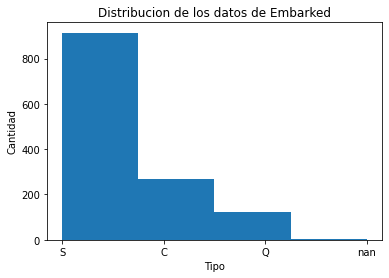

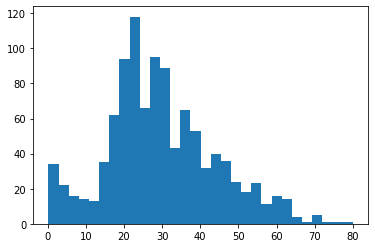

In [43]:

'''
Columns erased:

1. Name: Is not relevant to know if a passanger survive
2. Cabin: Have values with more than a 75% of data with NaN
'''
numericos = df.loc[:,['Age','SibSp','Parch','Ticket','Fare']]
categoricos = df.loc[:,['Survived','Pclass','Sex','Embarked']]
print("Descripcion:\n",numericos.describe())

for column in categoricos.columns:
	datos = categoricos.loc[:,column]
	categorias = datos.unique()
	mapeo = {}
	for i in range(len(categorias)):
		mapeo[categorias[i]] = i
	plt.hist(datos.map(mapeo),bins=len(categorias))
	plt.title("Distribucion de los datos de "+column)
	plt.xlabel("Tipo")
	plt.ylabel("Cantidad")
	plt.xticks(range(len(categorias)),categorias)
	plt.show()

plt.hist(numericos['Age'],bins=30)
plt.show()

In [44]:
import seaborn as sns
# Nos permite hacer el ploteo en todas las columnas
# sns.pairplot(df, hue = 'Survived')